## Lab 20
## Rex McArthur


In [2]:
from __future__ import division, print_function
from numpy.linalg import norm
import numpy as np
from matplotlib import pyplot as plt

#### Problem 1

Difference in iterations is  0.0
Final time =  0.2


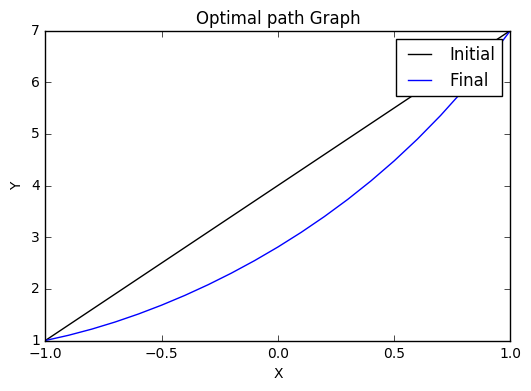

In [3]:
a, b = -1, 1.
alpha, beta = 1., 7.
x_steps, time_steps, final_T = 20, 250, .2
####  Define variables x_steps, final_T, time_steps  ####
delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
x0 = np.linspace(a,b,x_steps+1)

if delta_t/delta_x**2. > .5:
    print("stability condition fails")
u = np.empty((2,x_steps+1))
u[0]  = (beta - alpha)/(b-a)*(x0-a)  + alpha
plt.plot(x0, u[0],c='k', label='Initial')
u[1] = (beta - alpha)/(b-a)*(x0-a)  + alpha

def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])
# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1])
    if norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1
print("Difference in iterations is ", norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

plt.plot(x0, u[0], label='Final')
plt.plot()
plt.legend()
plt.title("Optimal path Graph")
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## Problem 2

In [4]:
from numpy.random import randint, uniform, randn
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.misc import imread, imsave
imagename = 'balloons_resized_bw.jpg'
changed_pixels=40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.


IM = imread(imagename, flatten=True) * (1. / 255)

IM_x, IM_y = IM.shape

for lost in xrange(changed_pixels):
    x_,y_ = randint(1,IM_x-2), randint(1,IM_y-2)
    val = .1*randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)
    
imsave(name=("noised_"+imagename),arr=IM)

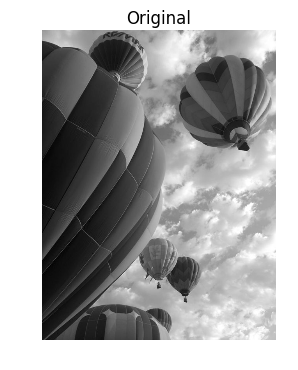

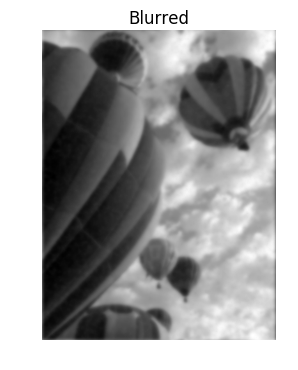

In [7]:
delx = 1
dely = 1
delt = 1e-3
lamb = 40
time_steps = 250

final_T = 1e-3*250

a, b = -1, 1.
alpha, beta = 1., 7.
time_steps, final_T = 250, 1e-3*250
lamb = 40
####  Define variables x_steps, final_T, time_steps  ####
delta_t, delta_x, delta_y = 1e-3, 1,1
x0 = np.linspace(a,b,x_steps+1)

# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print("stability condition fails")

def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])
    
noised = imread('noised_balloons_resized_bw.jpg')
blurred = noised.copy()
# Time step until successive iterations are close
iteration = 0

while iteration < time_steps:
    uxx = (np.roll(blurred,-1, axis = 1) - 2 * blurred + np.roll(blurred,1,axis = 1)) / delx**2
    uyy = (np.roll(blurred,-1, axis = 0) - 2 * blurred + np.roll(blurred,1,axis = 0)) / dely**2
    ut = -(blurred - noised - lamb * (uxx + uyy))
    blurred = ut * delt + blurred
    iteration+=1
    
pic = imread('balloons_resized_bw.jpg')
for image,name in [(pic,'Original'), (noised, 'Noisy'), (blurred,'Blurred')]:
    
    plt.imshow(image, cmap = cm.gray)
    plt.title(name)
    plt.axis('off')
    plt.show()


### Problem 3

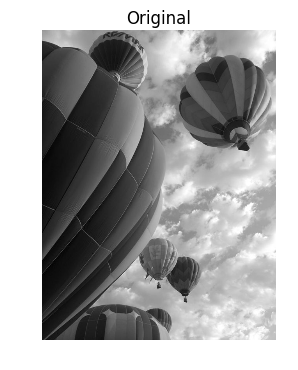

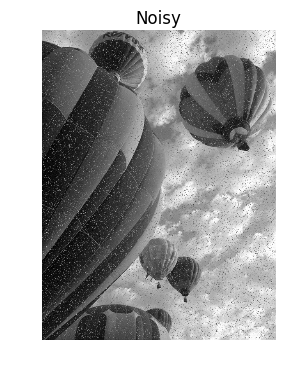

In [11]:
delx = 1
dely = 1
delt = 1e-3
lamb = 1
time_steps = 200

# Check a stability condition for this numerical method
if delt/delx**2. > .5:
    print("stability condition fails")
    
f = imread('noised_balloons_resized_bw.jpg', flatten = True) * (1./255)
u = f.copy()
# Time step until successive iterations are close
iteration = 0
eps = .0001
while iteration < time_steps:
    ux = (np.roll(u,-1,axis = 1) - np.roll(u, 1, axis = 1))/ 2.
    uy = (np.roll(u,-1,axis = 0) - np.roll(u, 1, axis = 0))/ 2.
    uxx = (np.roll(u,-1, axis = 1) - 2 * u + np.roll(u,1,axis = 1)) / delx**2
    uyy = (np.roll(u,-1, axis = 0) - 2 * u + np.roll(u,1,axis = 0)) / dely**2
    uxy = (np.roll(ux, -1, axis = 0) - np.roll(ux, 1, axis = 0)) / 2.
    ut = -lamb * (u - f) + (uxx * uy**2 + uyy * ux**2 - 2*ux*uy*uxy)/((eps + ux**2 + uy**2)**(3./2))
    u = ut * delt + u.copy()
    iteration+=1
blurred = u
pic = imread('balloons_resized_bw.jpg')

for image,name in [(pic,'Original'), (f, 'Noisy'), (blurred,'Blurred')]:
    
    plt.imshow(image, cmap = cm.gray)
    plt.title(name)
    plt.axis('off')
    plt.show()

